In [1]:
import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import curve_fit
import scipy
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

ledd=np.log10(1.3)+38#Eddington luminosity of Solar Mass

#%matplotlib inline

In [93]:
def linear(x,a,b,c):
    return a+b*x[0]+c*x[1]

In [30]:
rqa=np.loadtxt('Downloads/fundamental_data/data0612radioquiet.txt')#radio quiet agn data
xrb=np.loadtxt('Downloads/fundamental_data/data0612allxrb.txt')#all xrb data
anx=np.loadtxt('Downloads/fundamental_data/data0612allagnandxrb.txt')#all data
rla=np.loadtxt('Downloads/fundamental_data/data0612radioloud.txt')#all radio loud agn
rqx=np.loadtxt('Downloads/fundamental_data/data0612radioquietagnandxrb.txt')#all radio quiet agn and xrb
agn=np.loadtxt('Downloads/fundamental_data/data0612allagn.txt')

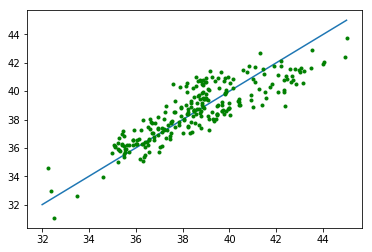

[ 1.35775761  0.71921014  0.89322117]
[ 1.35202488  0.03082648  0.08722038]


In [99]:
#all agn
#curve_fit
x0=agn[:,1:3]
y=agn[:,0]
x=np.transpose(x0)
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(32,46)
yy=np.arange(32,46)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

#same with matrix method
[[ 1.35775777]
 [ 0.71921014]
 [ 0.89322117]]

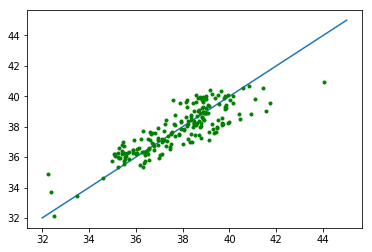

[ 8.19968715  0.58957793  0.66442534]
[ 1.2811166   0.02776613  0.07766573]


In [100]:
#radio quiet agn
x0=rqa[:,1:3]
y=rqa[:,0]
x=np.transpose(x0)
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(32,46)
yy=np.arange(32,46)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

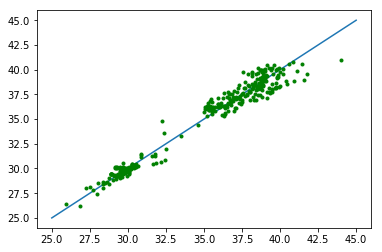

[ 7.59597056  0.59542602  0.70983916]
[ 0.72176607  0.02040482  0.01987654]


In [101]:
#radio quiet agn and xrb
x0=rqx[:,1:3]
y=rqx[:,0]
x=np.transpose(x0)
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(25,46)
yy=np.arange(25,46)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

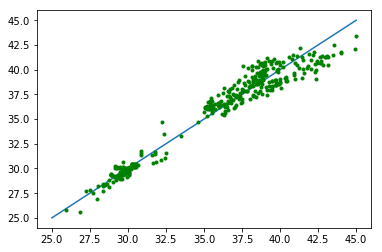

[ 3.95561574  0.69602065  0.69310598]
[ 0.85187042  0.02412848  0.02479418]


In [102]:
#agn and xrb
x0=anx[:,1:3]
y=anx[:,0]
x=np.transpose(x0)
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(25,46)
yy=np.arange(25,46)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

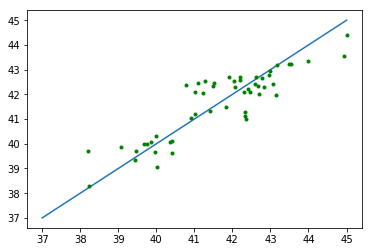

[ 7.68779659  0.79159666 -0.06076855]
[ 2.82630251  0.05964385  0.18069606]


In [104]:
#radio loud agn
x0=rla[:,1:3]
y=rla[:,0]

x=np.transpose(x0)
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(37,46)
yy=np.arange(37,46)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

In [242]:
#radio loud agn
x=rla[:,1]
y=rla[:,0]
fit=np.polyfit(x,y,1)
print(fit)
np.corrcoef(x,y)

[ 0.78859975  7.29301251]


array([[ 1.        ,  0.88572957],
       [ 0.88572957,  1.        ]])

[[ 1.35775777]
 [ 0.71921014]
 [ 0.89322117]]


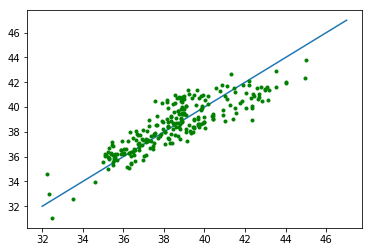

In [76]:
#matrix method
agn=np.loadtxt('Downloads/fundamental_data/data0612allagn.txt')
agn1=np.loadtxt('Downloads/fundamental_data/data0612allagn.txt')
x0=agn[:,0:3]
x0[:,0]=1
y0=agn1[:,0]
x=np.matrix(x0)
xt=x.T
y=np.matrix(y0)
yt=y.T
theta=(xt*x).I*xt*yt
print(theta)
ypred=theta[0]*x0[:,0]+theta[1]*x0[:,1]+theta[2]*x0[:,2]
ypred.shape,y.shape
xx=np.arange(32,48)
yy=np.arange(32,48)
plt.plot(xx,yy,'-')
plt.plot(y,ypred,'g.')
plt.show()


###methods test

In [137]:
import statsmodels.api as sm
import numpy as np

def regress_m(y,x):
    ones=np.ones(len(y))
    X=sm.add_constant(np.column_stack((x[0],ones)))
    for ele in x[1:]:
        X=sm.add_constant(np.column_stack((ele,X)))
    results=sm.OLS(y,X).fit()
    return results

#test statsmodel model

x=np.random.rand(2,100)*10+20
y=3+0.6*x[0]+1.1*x[1]+np.random.rand(100)*2
print(regress_m(y,x).summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1687.
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           4.48e-76
Time:                        16:41:25   Log-Likelihood:                -91.507
No. Observations:                 100   AIC:                             189.0
Df Residuals:                      97   BIC:                             196.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0949      0.021     51.851      0.0

In [166]:
import statsmodels.api as sm
import numpy as np

nobs=100
X=np.random.random((nobs,2))
X=sm.add_constant(X)
theta=[3,0.6,1.1]
e=np.random.random(nobs)
y=np.dot(X,theta)+e

result=sm.OLS(y,X).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     87.81
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           1.71e-22
Time:                        09:36:52   Log-Likelihood:                -15.231
No. Observations:                 100   AIC:                             36.46
Df Residuals:                      97   BIC:                             44.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.3628      0.073     45.821      0.0

In [81]:
#test sklearn LinearRegression
x=np.random.rand(2,100)*10+20
y=3+0.6*x[0]+1.1*x[1]+np.random.rand(100)*2
x=np.transpose(x)
clf=LinearRegression()
clf.fit(x,y)
print(clf.coef_,clf.intercept_,clf.score(x,y))

[ 0.59753449  1.08251449] 4.44897482188 0.978455865471


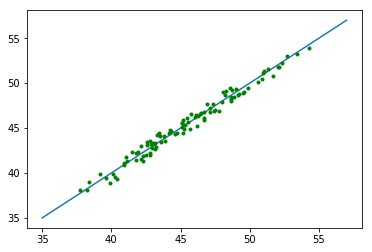

[ 3.9722345   0.60046732  1.09975255]
[ 0.64520401  0.01913214  0.01803415]


In [130]:
#test curve_fit
x=np.random.rand(2,100)*10+20
y=3+0.6*x[0]+1.1*x[1]+np.random.rand(100)*2
popt,pcov=curve_fit(linear,x,y)
perr=np.sqrt(np.diag(pcov))
xx=np.arange(35,58)
yy=np.arange(35,58)
plt.plot(xx,yy,'-')
plt.plot(y,linear(x,*popt),'g.')
plt.show()
print(popt)
print(perr)

In [40]:
#test linear regression
import numpy as np
a=np.random.rand(100,3)*10+20
a[:,0]=1
x=np.matrix(a)

b=3+0.6*a[:,1]+1.1*a[:,2]+np.random.rand(100)*2
y=np.matrix(b)
xt=x.T
yt=y.T
theta=(xt*x).I*xt*yt
print(theta)
print(a.shape,b.shape,y.shape)

[[ 3.78874166]
 [ 0.61759225]
 [ 1.0868239 ]]
(100, 3) (100,) (1, 100)


In [184]:
import lmfit
from scipy.optimize import leastsq
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def residual(p,x,y,sigma0=0.3):
    a=p[0]
    b=p[1]
    c=p[2]
    model=a+b*x[0]+c*x[1]
    return (model-y)/sigma0

x=np.random.rand(2,100)*10+20
y=3+0.6*x[0]+1.1*x[1]+np.random.random(100)*0.3
p=[3,0.6,1.1,0.3]
out=leastsq(residual,p,args=(x,y,0.3))
print(out)

(array([ 3.1110631 ,  0.60284854,  1.09880373,  0.3       ]), 2)


In [236]:
import lmfit
from scipy.optimize import leastsq
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.random.rand(2,100)*10+20
y=3+0.6*x[0]+1.1*x[1]+np.random.random(100)*0.3


p=lmfit.Parameters()
p.add_many(('a',3),('b',0.6),('c',1.1))


def residual(p):
    sigma0=0.3
    a=p['a']
    b=p['b']
    c=p['c']
    model=a+b*x[0]+c*x[1]
    return (model-y)/sigma0

mini=lmfit.Minimizer(residual,p)
out1=mini.minimize(method='Nelder')
out2=mini.minimize(method='leastsq',params=out1.params)



In [241]:
from lmfit import Parameters,minimize,fit_report
print(fit_report(out2))

[[Fit Statistics]]
    # function evals   = 7
    # data points      = 100
    # variables        = 3
    chi-square         = 8.519
    reduced chi-square = 0.088
    Akaike info crit   = -240.282
    Bayesian info crit = -232.467
[[Variables]]
    a:   3.22171127 +/- 0.120359 (3.74%) (init= 3.221662)
    b:   0.59728997 +/- 0.003225 (0.54%) (init= 0.5972919)
    c:   1.09966194 +/- 0.003388 (0.31%) (init= 1.099662)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, c)                      = -0.735 
    C(a, b)                      = -0.692 


In [238]:
res=mini.emcee(burn=300,steps=600,thin=10,params=out1.params)

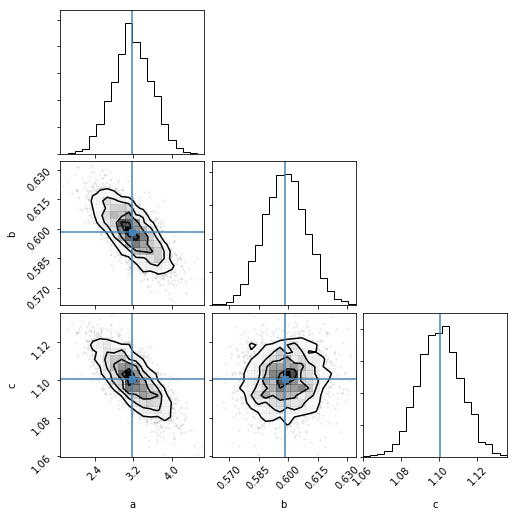

In [239]:
import corner
corner.corner(res.flatchain,labels=res.var_names,truths=list(res.params.valuesdict().values()))

In [195]:
lmfit.report_fit(out2.params,min_correl=0.5)

[[Variables]]
    a:   3.07543544 +/- 0.118937 (3.87%) (init= 3.075437)
    b:   0.59911359 +/- 0.003332 (0.56%) (init= 0.5991131)
    c:   1.10415315 +/- 0.003088 (0.28%) (init= 1.104153)
[[Correlations]] (unreported correlations are <  0.500)
    C(a, b)                      = -0.757 
    C(a, c)                      = -0.708 


In [200]:
lmfit.report_errors(out2.params,min_correl=0.5)

[[Variables]]
    a:   3.07543544 +/- 0.118937 (3.87%) (init= 3.075437)
    b:   0.59911359 +/- 0.003332 (0.56%) (init= 0.5991131)
    c:   1.10415315 +/- 0.003088 (0.28%) (init= 1.104153)
[[Correlations]] (unreported correlations are <  0.500)
    C(a, b)                      = -0.757 
    C(a, c)                      = -0.708 


In [199]:
lmfit.report_fit(out1.params)

[[Variables]]
    a:   3.07543691 (init= 3)
    b:   0.59911312 (init= 0.6)
    c:   1.10415327 (init= 1.1)


In [196]:
lmfit.report_fit(out1.params,min_correl=0.5)

[[Variables]]
    a:   3.07543691 (init= 3)
    b:   0.59911312 (init= 0.6)
    c:   1.10415327 (init= 1.1)


In [203]:
ci,trace=lmfit.conf_interval(mini,out2,trace=True,verbose=False)

In [204]:
lmfit.printfuncs.report_ci(ci)

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -0.36624  -0.24098  -0.11957   3.07544  +0.11957  +0.24098  +0.36624
 b:  -0.01026  -0.00676  -0.00335   0.59911  +0.00335  +0.00676  +0.01026
 c:  -0.00950  -0.00626  -0.00309   1.10415  +0.00309  +0.00626  +0.00950


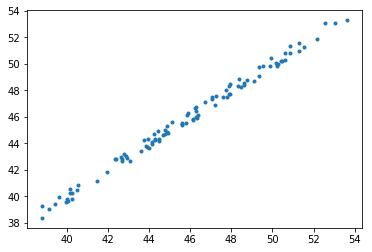

In [225]:
plt.plot(y, residual(out2.params)+y,'.' )
plt.show()

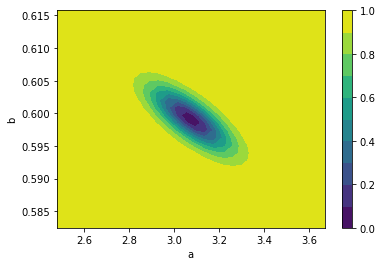

In [226]:
cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a','b',30,30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('a')
plt.colorbar()
plt.ylabel('b')
plt.show()

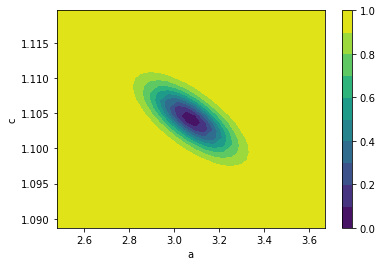

In [229]:
cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a','c',30,30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('a')
plt.colorbar()
plt.ylabel('c')
plt.show()

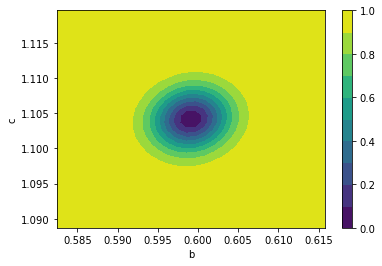

In [234]:
cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'b','c',30,30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('b')
plt.colorbar()
plt.ylabel('c')
plt.show()

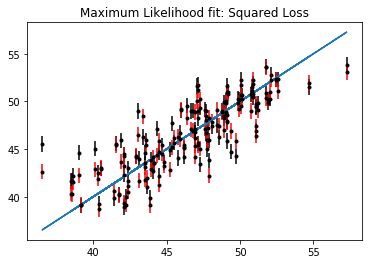

In [39]:
%matplotlib inline
#test square loss

import matplotlib.pyplot as plt
import numpy as np
x=np.random.rand(2,100)*10+20
y0=3+0.6*x[0]+1.1*x[1]
y=3+0.6*x[0]+1.1*x[1]+np.random.normal(0,1,100)*2
err=0.8

def squared_loss(theta, x=x, y=y, sigma_r=0.3,sigma_x=0.3,sigma_m=0.3):
    dy = y - theta[0] - theta[1] * x[0]-theta[2]*x[1]
    deno=sigma_r**2+x[0]**2*sigma_x**2+x[1]**2*sigma_m**2
    return np.sum(dy**2/deno**2)

def squared_loss_only_y(theta, x=x, y=y, sigma_r=0.3):
    dy = y - theta[0] - theta[1] * x[0]-theta[2]*x[1]
    return np.sum(dy**2/sigma_r**2)
theta1 = optimize.fmin(squared_loss_only_y, [0,0,0], disp=False)

plt.plot(y, y)
plt.errorbar(y,theta[0] + theta[1] * x[0]+theta[2]*x[1],err, fmt='.k', ecolor='black')
plt.errorbar(y,theta[0] + theta1[1] * x[0]+theta1[2]*x[1],err, fmt='.k', ecolor='red')
plt.title('Maximum Likelihood fit: Squared Loss');

In [40]:
theta,theta1

(array([-0.53597482,  1.02891375,  0.83023827]),
 array([-0.41875304,  0.71172023,  1.13522538]))

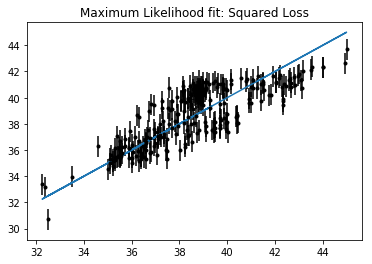

In [41]:
from scipy import optimize
x0=agn[:,1:3]
y=agn[:,0]
x=np.transpose(x0)

def squared_loss(theta, x=x, y=y, sigma_r=0.3,sigma_x=0.3,sigma_m=0.3):
    dy = y - theta[0] - theta[1] * x[0]-theta[2]*x[1]
    deno=sigma_r**2+x[0]**2*sigma_x**2+x[1]**2*sigma_m**2
    return np.sum(dy**2/deno**2)
theta = optimize.fmin(squared_loss, [0,0,0], disp=False)
plt.plot(y, y)
plt.errorbar(y,theta[0] + theta[1] * x[0]+theta[2]*x[1],err, fmt='.k', ecolor='black')
plt.title('Maximum Likelihood fit: Squared Loss');

In [42]:
x.shape,y.shape

((2, 254), (254,))

In [43]:
theta

array([-0.66136949,  0.9217987 ,  0.09705679])

In [ ]:
def log_prior(theta):
    #theta needs to be between -100 and 100
    if (all(theta[:] > -100) and all(theta[:] < 100)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_r,sigma_x,sigma_m):
    dy = y - theta[0] - theta[1] * x[0]-theta[1]*x[1]
    theta = np.clip(theta[:], -100, 100) 
    logL =  - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    return np.sum(dy)

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)